### import modules

In [2]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re

### run isc over all individual files

In [4]:
n_iter = 1

folder_paths = ['../data/00_raw_fmri/season01/',
                '../data/00_raw_fmri/season02/',
                '../data/00_raw_fmri/season03/',
                '../data/00_raw_fmri/season04/',
                '../data/00_raw_fmri/season05/',
                '../data/00_raw_fmri/season06/']
                
for current_folder in folder_paths:
    print(current_folder)
    files = sorted(os.listdir(current_folder))  # Sorts alphabetically
    
    for current_index in range(len(files)):
        file_path = current_folder + files[current_index]
        data = np.load(file_path)
        
        isc_results = []
        for curr_roi in tqdm(range(1000)):
                    data_roi_df = pd.DataFrame( data[:,:,curr_roi].T)
                    stats_boot = isc(data_roi_df, method='phase_randomize', n_samples=n_iter, return_null=False)
                    isc_results.append(stats_boot['isc'])
        
        isc_result_file = '../data/01_isc_results/' + "isc_" + files[current_index][:-4] + '.npy'
        np.save(isc_result_file, isc_results)

../data/00_raw_fmri/season01/


 37%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                                 | 369/1000 [00:06<00:10, 58.56it/s]


KeyboardInterrupt: 

In [3]:

my_file = '../data/00_raw_fmri/season01/task-s01e01a.npy'
data = np.load(my_file)
data.shape

(4, 592, 1000)

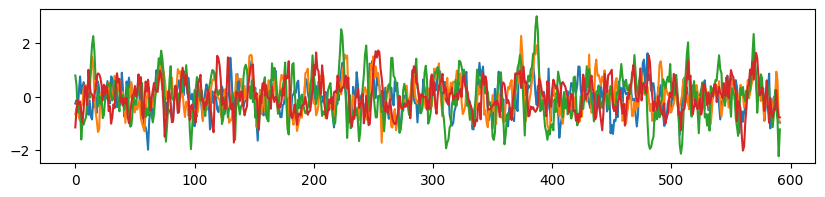

In [4]:
plt.figure(figsize = (10,2))
plt.plot(data[0,:,550])
plt.plot(data[1,:,550])
plt.plot(data[2,:,550])
plt.plot(data[3,:,550])

In [5]:
result = []
for i in range(1000):
    result.append(np.corrcoef(data[0,:,i],
                              data[1,:,i])[0,1])
    #print(result)

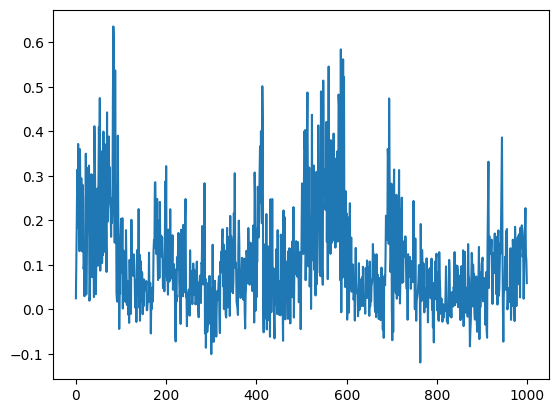

In [7]:
plt.plot(result)